# Predição de bons pagadores de cartão de crédito

## 1. Bibliotecas

In [90]:
import pandas as pd

## 2. Carregando Dados

In [91]:
URL = 'https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/raw/refs/heads/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls'
df = pd.read_excel(URL)

## 3. Verificando a integridade dos dados

### 3.1 Verificando as colunas
1) Examine os nomes das colunas executando o comando a seguir na célula: df.columns

In [92]:
print(f'Total de colunas: {len(df.columns)}', '\n')
df.columns

Total de colunas: 25 



Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### 3.1.1 Dicionário de dados

# 📊 Dicionário de Dados

## Variável Resposta
| Nome | Tipo | Descrição |
|------|------|-----------|
| **default_payment** | Binária (0/1) | Indica inadimplência do pagamento: 1 = Sim, 0 = Não |

---

## Variáveis Explicativas

### 1. Informações Demográficas e de Crédito
| Código | Descrição | Tipo / Escala |
|--------|-----------|---------------|
| **X1** | Montante de crédito concedido (NT dólar), incluindo crédito individual e suplementar da família | Numérica contínua |
| **X2** | Gênero: 1 = Masculino; 2 = Feminino | Categórica |
| **X3** | Escolaridade: 1 = Pós-graduação; 2 = Universidade; 3 = Ensino Médio; 4 = Outros | Categórica |
| **X4** | Estado civil: 1 = Casado; 2 = Solteiro; 3 = Outros | Categórica |
| **X5** | Idade (anos) | Numérica inteira |

---

### 2. Histórico de Pagamentos (Abril a Setembro/2005)
Escala de medição:
- **-1** = Pagamento em dia  
- **1** = Atraso de 1 mês  
- **2** = Atraso de 2 meses  
- ...  
- **8** = Atraso de 8 meses  
- **9** = Atraso de 9 meses ou mais  

| Código | Mês/Ano | Descrição |
|--------|---------|-----------|
| **X6** | Set/2005 | Status do pagamento |
| **X7** | Ago/2005 | Status do pagamento |
| **X8** | Jul/2005 | Status do pagamento |
| **X9** | Jun/2005 | Status do pagamento |
| **X10** | Mai/2005 | Status do pagamento |
| **X11** | Abr/2005 | Status do pagamento |

---

### 3. Valor da Fatura (NT dólar)
| Código | Mês/Ano | Descrição |
|--------|---------|-----------|
| **X12** | Set/2005 | Valor da fatura |
| **X13** | Ago/2005 | Valor da fatura |
| **X14** | Jul/2005 | Valor da fatura |
| **X15** | Jun/2005 | Valor da fatura |
| **X16** | Mai/2005 | Valor da fatura |
| **X17** | Abr/2005 | Valor da fatura |

---

### 4. Valor do Pagamento Anterior (NT dólar)
| Código | Mês/Ano | Descrição |
|--------|---------|-----------|
| **X18** | Set/2005 | Valor do pagamento anterior |
| **X19** | Ago/2005 | Valor do pagamento anterior |
| **X20** | Jul/2005 | Valor do pagamento anterior |
| **X21** | Jun/2005 | Valor do pagamento anterior |
| **X22** | Mai/2005 | Valor do pagamento anterior |
| **X23** | Abr/2005 | Valor do pagamento anterior |


### 3.2 Dando uma olhada nos nossos dados.
2) Digite o comando a seguir na célula subsequente e execute-o usando
Shift + Enter: `df.head()`

In [93]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 3.3 Verificando se todos os IDs são únicos
3) Selecione a coluna alvo (ID) e conte os valores exclusivos usando o
comando a seguir: `df['ID'].nunique()`


In [94]:
df['ID'].nunique()

29687

Como foi retornado um valor menor que 30000, então há linhas que estão se repetindo.

### 3.4 Verificando o total de linhas

In [95]:
df.shape[0] # Retorna apenas a primeira posição da tupla - linhas

30000

### 3.5 Contagem de IDs
5) Armazene as contagens de valores em uma variável denida como
`id_counts` e exiba os valores armazenados usando o método `.head()`,
como mostrado:

In [96]:
id_counts = df['ID'].value_counts()
id_counts.head()

,count
ID,
89f8f447-fca8,2
7c9b7473-cc2f,2
90330d02-82d9,2
75938fec-e5ec,2
2a793ecf-05c6,2


### 3.6 Contagem de repetições
6) Exiba o número de entradas duplicadas agrupadas executando outra
contagem de valores:

`id_counts.value_counts()`

In [97]:
id_counts.value_counts()

,count
count,
1,29374
2,313


A primeira linha mostra quantos números aparecem apenas uma vez, já a segunda mostra quantos números apareceram duas vezes.
`1*29374+2*313 = 30000`

## 4. Análise de Dados Duplicados
1) Continuando onde paramos no Exercício 3, queremos os índices da
série id_counts cuja contagem é 2 para localizar as duplicatas.
Atribuiremos os IDs duplicados a uma variável chamada dupe_mask e
exibiremos os cinco primeiros IDs duplicados usando os comandos a
seguir:
`dupe_mask = id_counts == 2`

`dupe_mask[0:5]`

### 4.1 IDs que se repetem

In [98]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

,count
ID,
89f8f447-fca8,True
7c9b7473-cc2f,True
90330d02-82d9,True
75938fec-e5ec,True
2a793ecf-05c6,True


### 4.2 Exibindo os 5 primeiros índices

2) Acesse o índice de id_count e exiba as cinco primeiras linhas como
contexto usando o comando a seguir:

`id_counts.index[0:5]`


In [99]:
id_counts.index[:5] # .index retorna apenas o índice, sem o valor associado a ele (que é o número de ocorrências de casa índice).

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6'],
      dtype='object', name='ID')

### 4.3 Selecionar os IDs duplicados.

3) Selecione e armazene os IDs duplicados em uma nova variável chamada
dupe_ids usando o comando a seguir:

`dupe_ids = id_counts.index[dupe_mask]`

In [100]:
dupe_ids = id_counts.index[dupe_mask] # Retorna os índices que estão duplicados baseada na máscara que está entre colchetes (verdadeiro e falso)
dupe_ids

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6', 'b44b81b2-7789', '7be61027-a493', '998fa9b2-b341',
       'a3a5c0fc-fdd6', '4e2380e6-a8cf',
       ...
       'b6ca3733-7459', '4f249cbc-5e9c', '3fddeb07-b7f0', '63338f74-01be',
       '327d06d5-ce7f', '71b5009c-75c8', 'b4937915-ad67', 'fc73f07e-eb96',
       '2a8ad33f-fa9c', '841ae407-dc4c'],
      dtype='object', name='ID', length=313)

### 4.4 Converter para lista
4) Converta dupe_ids em uma lista e obtenha seu tamanho usando os
seguintes comandos:

`dupe_ids = list(dupe_ids)`

`len(dupe_ids)`

In [101]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

### 4.5 Verificando os 5 primeiros itens

5) Verificaremos os dados de dupe_ids exibindo as cinco primeiras
entradas com o comando a seguir:

`dupe_ids[0:5]`

In [102]:
dupe_ids[0:5]

['89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9',
 '75938fec-e5ec',
 '2a793ecf-05c6']

### 4.6 Selecionando linhas com IDs duplicados

6) Execute o comando a seguir em seu Notebook para pôr em prática o
plano que formulamos na etapa anterior:

`df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)`

In [103]:
# Seleciona as 10 primeiras linhas em que a coluna 'ID' está entre os 3 primeiros valores da lista dupe_ids
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15879,7c9b7473-cc2f,90000,2,1,1,29,0,0,0,0,...,27751,20292,14937,2967,2007,1429,1092,412,263,0
15979,7c9b7473-cc2f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29646,90330d02-82d9,70000,1,2,1,29,0,0,0,0,...,10694,27908,11192,2009,1404,3016,20001,2000,5002,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.7 Preparando a matriz booleana para a filtragem do DataFrame

7) Crie uma matriz booleana com o mesmo tamanho do DataFrame
inteiro usando ==, como mostrado:

`df_zero_mask = df == 0`

In [104]:
df_zero_mask = df == 0
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


### 4.8 Criando uma série booleana

8) Crie a série booleana `feature_zero_mask`, como mostrado aqui:

`feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)`

In [105]:
# Seleciona todas as linhas e colunas (com exceção de ID) e verifica se os valores das colunas é igual a 0. Retorna False se o valor for diferente de 0 e True se for 0.
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
feature_zero_mask

,0
0,False
1,False
2,False
3,False
4,False
...,...
29995,False
29996,False
29997,False
29998,False


### 4.9 Soma de linhas com todas as colunas zeradas (exceto ID)
9) Calcule a soma da série booleana usando este comando:

`sum(feature_zero_mask)`

In [106]:
sum(feature_zero_mask)

315

### 4.10 Eliminar as linhas com todas as colunas zeradas

10) Limpe o DataFrame eliminando as linhas só com zeros, exceto pelo ID,
usando o código a seguir:

`df_clean_1 = df.loc[~feature_zero_mask,:].copy()`

In [107]:
#O uso do ~ é pra transformas os false em true e mostrar apenas as linhas que não estão zeradas
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
df_clean_1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### 4.11 Verificando o shape do DataFrame

11) Verifique o número de linhas e colunas de df_clean_1 executando o
código a seguir:

`df_clean_1.shape`

In [108]:
# Tamanho do novo dataframe
df_clean_1.shape

(29685, 25)

In [109]:
# Número de IDs exclusivos/únicos
df_clean_1['ID'].nunique()

29685

Como o número de linhas do novo DataFrame é igual ao número de IDs exclusivos, então a exclusão dos IDs duplicados em linhas zeradas foi concluída com sucesso.

## 5. Explorando e limpando os dados


### 5.1 Informações sobre o dataset

1) Obtenha o tipo de dado das colunas do dataset usando o método `.info()` como mostrado:

`df_clean_1.info()`

In [110]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


Podemos observar que a coluna `PAY_1` não está np tipo `int64` como as outras. Portanto, isso será visto mais adiante.

### 5.2 Visualizando as 5 primeiras linhas
2) Use o método .head(n) do pandas para visualizar as n linhas
superiores da série PAY_1:

`df_clean_1['PAY_1'].head(5)`

In [111]:
df_clean_1['PAY_1'].head(5)

,PAY_1
0,2
1,-1
2,0
3,0
4,-1


De acordo com o dicionário, -1 significa pagamento em dia e a partir do número 1 o número de meses de atraso. Logo, no dicionário não há um significado para o número 1 na coluna, o que é uma inconsistência.

### 5.3 Contagem de valores únicos

Obtenha as contagens de valores da coluna `PAY_1` usando o método `.value_counts()`:

`df_clean_1['PAY_1'].value_counts()`

In [112]:
df_clean_1['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
Not available,3021
-2,2476
2,2378
3,292
4,63
5,23


Verifica-se que há dois valores não definidos pelo dicionário: -2, 0 e 'Not available' (valor faltante - e isso fez a coluna virar do tipo object). Portanto, as linhas que contiverem esses valores serão excluídas (por enquanto, já que não sabemos o que fazer com esses valores faltantes ou incorretos).

### 5.4 Criar a máscara booleana para remover valores ausentes

4) Use uma máscara lógica com o operador != (que significa “diferente
de” em Python) para encontrar todas as linhas que não têm dados
ausentes para a característica de PAY_1:

`valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'`

`valid_pay_1_mask[0:5]`

In [113]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available' # Retorna para a variável True ou False dizendo se naquela posição o valor é diferente de 'Not available'
valid_pay_1_mask[:5]

,PAY_1
0,True
1,True
2,True
3,True
4,True


### 5.5 Soma dos valores True

5) Verifique quantas linhas não têm dados ausentes calculando a soma da
máscara:

`sum(valid_pay_1_mask)`

In [114]:
sum(valid_pay_1_mask) # Soma as linhas se o valor da coluna PAY_1 tiver retornado True no passo anterior, ou seja, soma as linhas que contém algum valor de fato

26664

### 5.6 Limpando as linhas incorretas

6) Limpe os dados eliminando as linhas de PAY_1 com valores ausentes
como mostrado aqui:

`df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()`

In [115]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy() # Cria uma cópia do dataset apenas com as linhas que contém valores válidos na coluna PAY_1, baseado na máscara feita

### 5.7 Verificando o `shape` do DataFrame
7) Obtenha a dimensão dos dados limpos usando o comando a seguir:

`df_clean_2.shape`

In [116]:
df_clean_2.shape

(26664, 25)

### 5.8 Corrigindo o tipo de dado da coluna `PAY_1`

8) Execute o comando a seguir para converter o tipo de dado de PAY_1 de
object para int64 e exiba os metadados das colunas PAY_1 e PAY_2:

`df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')`

`df_clean_2[['PAY_1', 'PAY_2']].info()`

In [117]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1','PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


**Explicações adicionais sobre as colunas feitas pelo sócio da empresa**

* -2: significa que a conta começou o mês sem valor a ser pago e ocrédito não foi usado;
* -1: significa que a conta usou um valor que foi totalmente pago
* 0: significa que o pagamento mínimo foi feito, mas o saldo total
devedor não foi pago

## 6. Explorando o limite de crédito e as características demográficas

### 6.1 Importando bibliotecas e configurando o Matplotlib

1) Importe o matplotlib e defina algumas opções de plotagem com este
fragmento de código:

`import matplotlib.pyplot as plt #importa o pacote de plotagem`

`%matplotlib inline #renderiza a plotagem automaticamente`

`import matplotlib as mpl #recurso adicional de plotagem`

In [118]:
import matplotlib as mpl
import matplotlib.pyplot as plt # Importa o pacote de plotagem - responsável por gerar os gráficos

# Renderiza a plotagem automática
%matplotlib inline

### 6.2 Gerar histrogramas `AGE` e `LIMIT_BAL`

2) Execute `df_clean_2[['LIMIT_BAL', 'AGE']].hist()`

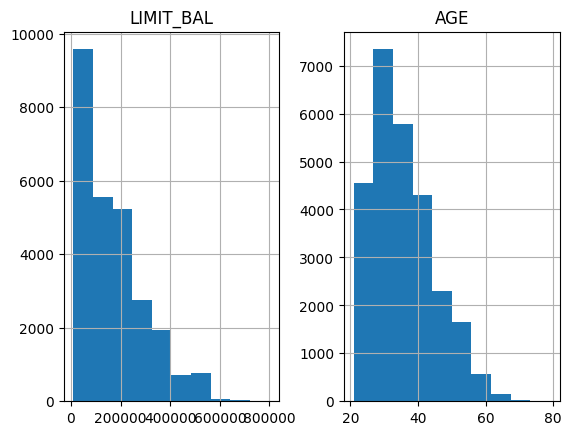

In [119]:
df_clean_2[['LIMIT_BAL','AGE']].hist();

### 6.3 Estatística Descritiva de `AGE` e `LIMIT_BAL`

3) Gere um relatório tabular de síntese estatística usando o comando a seguir:

`df_clean_2[['LIMIT_BAL', 'AGE']].describe()`

In [120]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


- `count`: O número de valores não nulos nas colunas.
- `mean`: A média dos valores.
- `std`: O desvio padrão, que mede a dispersão dos dados em relação à média.
- `min`: O valor mínimo nas colunas.
- `25%`: O primeiro quartil (Q1), que é o valor abaixo do qual 25% dos dados se - encontram.
- `50%`: A mediana (Q2), que é o valor do meio dos dados (50% dos dados estão abaixo deste valor).
- `75%`: O terceiro quartil (Q3), que é o valor abaixo do qual 75% dos dados se encontram.
- `max`: O valor máximo nas colunas.

### 6.4 Contagem de ocorrências por categoria em `EDUCATION`

4) Obtenha as contagens de valores da característica EDUCATION usando o
código a seguir:

`df_clean_2['EDUCATION'].value_counts()`

In [121]:
df_clean_2['EDUCATION'].value_counts() # Contando quantas vezes um determinado valor aparece na coluna 'EDUCATION'

,count
EDUCATION,
2,12458
1,9412
3,4380
5,245
4,115
6,43
0,11


Aqui, vemos os graus de instrução não documentados 0, 5 e 6, já que o
dicionário de dados descreve apenas “Instrução (1 = pós-graduação; 2 =
universidade; 3 = ensino médio; 4 = outros)”. O sócio da empresa nos
disse que não conhece os outros graus. Já que eles não são predominantes, vamos agrupá-los na categoria “outros”, que parece apropriada, claro que com o consentimento de nosso cliente.

### 6.5 Transformar 0, 5 e 6 em outros (4)

5) Execute este código para combinar os graus não documentados da
característica EDUCATION com o grau “outros” e examine os resultados:

`df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)`
`df_clean_2['EDUCATION'].value_counts()`

In [122]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True) # inplace permite que a alteração seja feita no DataFrame original, não apenas uma cópia
df_clean_2['EDUCATION'].value_counts()

/tmp/ipython-input-1151649261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True) # inplace permite que a alteração seja feita no DataFrame original, não apenas uma cópia


,count
EDUCATION,
2,12458
1,9412
3,4380
4,414


### 6.6 Contagem de ocorrências por categoria em MARRIAGE

6) Obtenha as contagens de valores da característica MARRIAGE usando o
código a seguir:
`df_clean_2['MARRIAGE'].value_counts()`

In [123]:
df_clean_2['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,14158
1,12172
3,286
0,48


0 não está definido no dicionário do Dataset, portanto ele será mudado para 3 (outros)

### 6.7 Transformar 0 em outros (3)
7) Altere os valores 0 da característica MARRIAGE para 3 e examine o
resultado com este código:

`df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)`

`df_clean_2['MARRIAGE'].value_counts()`

In [124]:
df_clean_2['MARRIAGE'].replace(to_replace = 0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

/tmp/ipython-input-1241686090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace = 0, value=3, inplace=True)


,count
MARRIAGE,
2,14158
1,12172
3,334


### Característica Categóricas (Experimento)

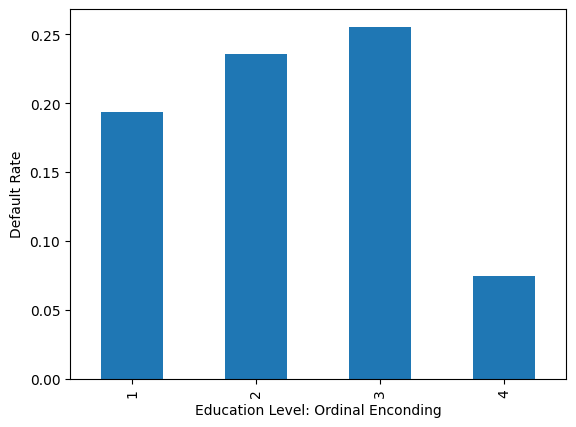

In [125]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default Rate')
plt.xlabel('Education Level: Ordinal Enconding');

## 7. Implementando a OHE para uma característica categória


### 7.1 Criando uma coluna vazia
1) Crie uma coluna vazia para os rótulos categóricos chamada
EDUCATION_CAT usando o comando a seguir:
`df_clean_2['EDUCATION_CAT'] = 'none'`

In [126]:
df_clean_2['EDUCATION_CAT'] = 'none'

### 7.2 Examinando as 10 primeiras linhas
2) Examine as primeiras linhas do DataFrame referentes às colunas
EDUCATION e EDUCATION_CAT:

`df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)`

In [127]:
  df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


### 7.3 Criando um dicionário de mapeamento de categorias

3) Crie um dicionário que descreva o mapeamento das categorias de
instrução usando o código a seguir:

`cat_mapping = {`

`1: "graduate school",`

`2: "university",`

`3: "high school",`

`4: "others"`
`}`

In [128]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

### 7.4 Aplicando o mapeamento de categorias

4. Aplique o mapeamento à coluna EDUCATION original usando .map e
atribua o resultado à nova coluna EDUCATION_CAT:

`df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)`

`df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)`

In [129]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping) # Preenche a coluna EDUCATION_MAP baseado no dicionário cat_mapping
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


### 7.5 Codificação de características com OHE

5. Execute esse código para criar um DataFrame de codificação one-hot da coluna EDUCATION_CAT. Examine as 10 primeiras linhas:

`edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])`

`edu_ohe.head(10)`

In [130]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


## 7.6 Concantenando o DataFrame original com OHE

6. Concatene o DataFrame de codificação one-hot com o original da
seguinte forma:

`df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)`

`df_with_ohe[['EDUCATION_CAT', 'graduate school','high school', 'university','others']].head(10)`

In [131]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe],axis=1)
df_with_ohe[['EDUCATION_CAT','graduate school','high school','university','others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,False,False,True,False
1,university,False,False,True,False
2,university,False,False,True,False
3,university,False,False,True,False
4,university,False,False,True,False
5,graduate school,True,False,False,False
6,graduate school,True,False,False,False
7,university,False,False,True,False
8,high school,False,True,False,False
9,high school,False,True,False,False


In [132]:
df_with_ohe.to_csv('/content/drive/MyDrive/Data Science/Colabs/Arquivos/chapter_1_cleaned_data.csv', index=False)